Enter the number of data100
Enter the number of class1
Enter the number of class2
Enter the number of class3
Enter the number of class4
Enter the number of class5
Enter the number of class6
Enter the number of class7
Enter the number of class8
Enter the number of class9
Enter the number of class10
[101.2146465956518, 101.78956035034369, 102.72150318147753, 102.36010204583033, 101.32425379972533, 101.91956834694038, 101.966463083544, 101.76006717161825, 101.68941099401508, 97.84088449253017]


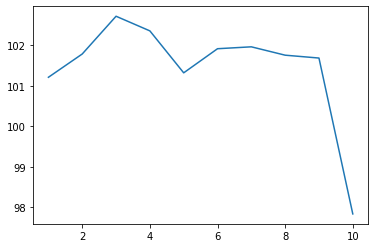

In [ ]:


from numpy.linalg import norm
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt 


#finding the number of class
def CNUM(x,y):
  s=0
  for i in range (k):
    A = float(x - center_x[i])
    B = float(y - center_y[i])
    #dist[i]= m.sqrt(A**2 + B**2)
    dist[i]= (A**2 + B**2)
    if dist[i] == min(dist):
      s = i 
  return s

# Data 
k= 10
data_number = input('Enter the number of data')
data_number = int(data_number)
center_y_new = np.empty(k)
center_x_new = np.empty(k)
center_x = np.empty(k)
center_y = np.empty(k)
dist = np.empty(k)
CLASS = [[]for _ in range (k)]
E22= [0 for _ in range (k)]
Error=[[]for _ in range (k)]
ErrorT= [[]for _ in range (k)]
A = [[]for _ in range (k)]
data = pd.read_csv("Dataset2.csv") 
flag = 1 
error_num= 10;
iteration = 1000

for s in range(error_num):
  k = input('Enter the number of class')
  k = int(k)
  
  # Center initializing
  for i in range (k):
   center_x[i] = np.random.uniform(size=(1,1)) 
   center_y[i] = np.random.uniform(size=(1,1))

 #input data & classification
  def classify(x):
    A = [[]for _ in range (k)]
    for j in range (data_number):
      X = data.iloc[[j],[0]].values
      Y = data.iloc[[j],[1]].values
      X = float(X)
      Y = float(Y)
      index = CNUM(X,Y)
      A[index].append([float(X),Y])
    return A

  CLASS= classify(data_number)

  #Finding new centers  
  for o in range (k):
    if CLASS[o] != []:
      m =np.mean(CLASS[o], axis=0)
      #print(m)
      center_x_new[o] = float(m[0])
      center_y_new[o] = float(m[1])
      #print(center_y_new[o])

   #Reclassification by new centers
  for j in range (iteration):
   while flag:
     for i in range (k):
       C = center_x_new[i]- center_x[i]
       D = center_y_new[i]-center_y[i]
       C = C.astype('float')
       D = D.astype('float')
       E2 = C**2+D**2
       if E2 > (0.001)**2:
         center_x[i] = center_x_new[i]
         center_y[i] = center_y_new[i]
     CLASS= classify(data_number)

     #finding distance between the new center & old one
     for m in range (k):
       C2 = center_x_new[m]- center_x[m]
       D2 = center_y_new[m]-center_y[m]
       C2 = C2.astype('float')
       D2 = D2.astype('float')
       E22[m] = C**2+D**2
     if (np.sum(E22) < (0.001)**2):
       flag = 0 
  E =0
  for a in range (k):

    for b in range (len(CLASS[a])):
      C3 = CLASS[a][b][0]- center_x[a]
      D3 = CLASS[a][b][1]-center_y[a]
      C3 = C3.astype('float')
      D3 = D3.astype('float')
      E =E + C3**2+D3**2
  E = E/(data_number)
#Error = np.mean(Error)

  ErrorT[s]= E 

print(ErrorT)
y =[1,2,3,4,5,6,7,8,9,10]
plt.plot(y,ErrorT)
plt.show()
    


  

